<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

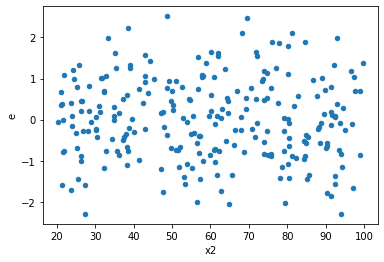

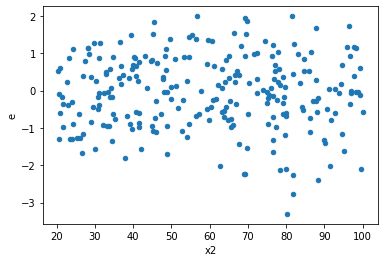

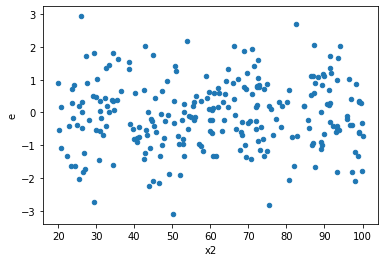

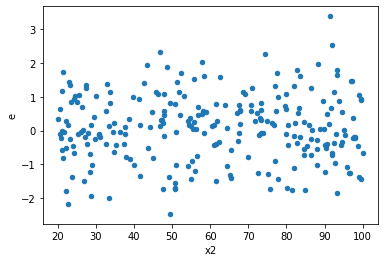

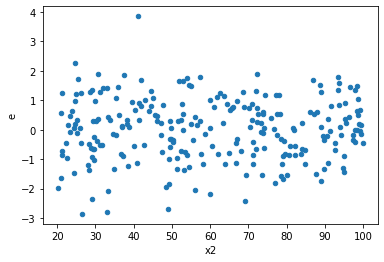

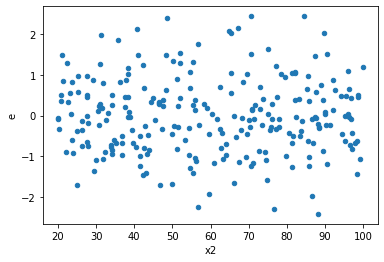

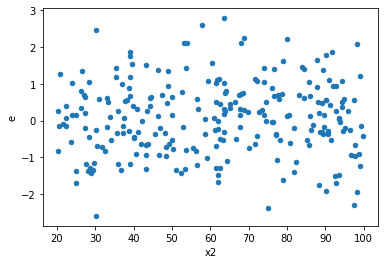

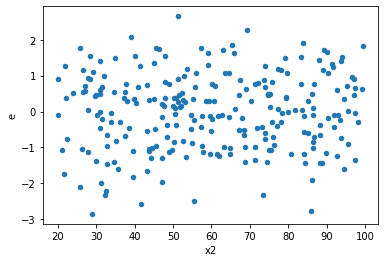

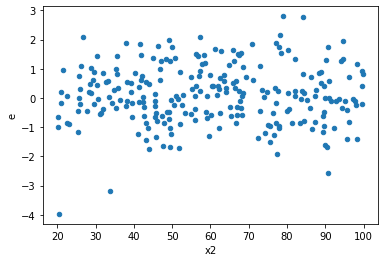

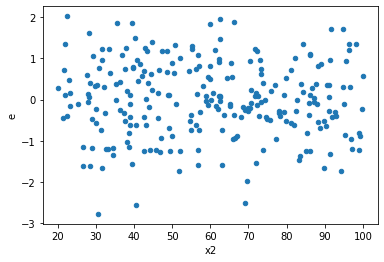

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,118.0,124.0,108.95427974507182,123.65348036923763,0.923341353771795,0.9972054868486906,1.0799965611581945,0.6716739958732449,0.6641630020633775,0.33583699793662247,Reject001=1 : Homoscedasticity
4.0,127.0,115.0,126.79618014877613,139.07778160612747,0.9983951192817018,1.2093720139663258,1.2113160317093816,0.2958152820334612,0.8520923589832694,0.1479076410167306,Reject001=1 : Homoscedasticity
5.0,112.0,130.0,85.69928863410182,120.33026095311445,0.7651722199473376,0.9256173919470342,1.2096850458198012,0.29458230517829986,0.8527088474108501,0.14729115258914993,Reject001=1 : Homoscedasticity
6.0,128.0,114.0,123.61108981623654,113.09335086735253,0.965711639189348,0.9920469374329169,1.027270353980279,0.8856044341680667,0.5571977829159667,0.44280221708403333,Reject001=1 : Homoscedasticity
7.0,140.0,102.0,147.70600293269513,119.69809575164713,1.0550428780906795,1.1735107426632072,1.1122872510991402,0.5717646504232865,0.7141176747883567,0.28588232521164325,Reject001=1 : Homoscedasticity
8.0,118.0,124.0,103.14517589432312,142.51625525654293,0.8741116601213823,1.1493246391656688,1.3148487677261615,0.13289961385819615,0.9335501930709019,0.06644980692909808,Reject001=1 : Homoscedasticity
9.0,113.0,129.0,90.93448342914694,109.66357372564705,0.8047299418508579,0.8501052226794346,1.0563857245378676,0.7606749933914001,0.6196625033043,0.38033749669570005,Reject001=1 : Homoscedasticity
10.0,93.0,149.0,78.29657496755243,152.1413125892597,0.8418986555650799,1.0210826348272464,1.2128331932563767,0.2929543462534858,0.8535228268732571,0.1464771731267429,Reject001=1 : Homoscedasticity
11.0,131.0,111.0,129.61736918797646,116.15756658313319,0.989445566320431,1.0464645638120107,1.0576272201649486,0.7632806070546609,0.6183596964726695,0.38164030352733047,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,113.0,123.18486116768837,94.0710482274457,0.9549214044006851,0.8324871524552717,0.871786042933812,0.4494592159337344,Reject001=1 : Homoscedasticity
1.0,112.0,130.0,112.12836280416953,117.69363504870743,1.0011460964657994,0.9053356542208264,0.9042992400577711,0.5855662165405947,Reject001=1 : Homoscedasticity
2.0,125.0,117.0,144.77548880089103,123.4755837096728,1.1582039104071282,1.0553468693134427,0.9111926318246244,0.6084084332800864,Reject001=1 : Homoscedasticity
3.0,118.0,124.0,108.95427974507182,123.65348036923763,0.923341353771795,0.9972054868486906,1.0799965611581945,0.6716739958732449,Reject001=1 : Homoscedasticity
4.0,127.0,115.0,126.79618014877613,139.07778160612747,0.9983951192817018,1.2093720139663258,1.2113160317093816,0.2958152820334612,Reject001=1 : Homoscedasticity
5.0,112.0,130.0,85.69928863410182,120.33026095311445,0.7651722199473376,0.9256173919470342,1.2096850458198012,0.29458230517829986,Reject001=1 : Homoscedasticity
6.0,128.0,114.0,123.61108981623654,113.09335086735253,0.965711639189348,0.9920469374329169,1.027270353980279,0.8856044341680667,Reject001=1 : Homoscedasticity
7.0,140.0,102.0,147.70600293269513,119.69809575164713,1.0550428780906795,1.1735107426632072,1.1122872510991402,0.5717646504232865,Reject001=1 : Homoscedasticity
8.0,118.0,124.0,103.14517589432312,142.51625525654293,0.8741116601213823,1.1493246391656688,1.3148487677261615,0.13289961385819615,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      985
Reject001=0 : Heteroscedasticity     15
Name: Result_test, dtype: int64